# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

In [1]:
import numpy as np

def calculate_energy(spins):
    """
    Calculates the total energy of the Ising model.

    Parameters:
    spins (numpy.ndarray): Array of spin values (+1 or -1).

    Returns:
    energy (float): Total energy of the system.
    """
    energy = -np.sum(spins * np.roll(spins, 1, axis=0))  # Interaction with vertical neighbors
    energy -= np.sum(spins * np.roll(spins, 1, axis=1))   # Interaction with horizontal neighbors
    return energy


Explanation: This function calculates the total energy of the Ising model by summing the interactions between adjacent spins. The term spins * np.roll(spins, 1, axis=0) represents the interaction with vertical neighbors, and a similar term is used for horizontal neighbors. The negative sign ensures that lower energy is achieved when neighboring spins are aligned, reflecting ferromagnetic interactions. 

In [2]:
def metropolis(spins, temperature=1):
    """
    Implements the Metropolis algorithm for a single Monte Carlo step.

    Parameters:
    spins (numpy.ndarray): Array of spin values (+1 or -1).
    temperature (float): Temperature of the system.

    Returns:
    spins (numpy.ndarray): Updated array of spin values after a Metropolis step.
    """
    i, j = np.random.randint(0, spins.shape[0]), np.random.randint(0, spins.shape[1])
    old_spin = spins[i, j]
    spins[i, j] *= -1  # Flip the spin
    delta_energy = 2 * old_spin * (
        spins[(i - 1) % spins.shape[0], j]
        + spins[(i + 1) % spins.shape[0], j]
        + spins[i, (j - 1) % spins.shape[1]]
        + spins[i, (j + 1) % spins.shape[1]]
    )
    if np.random.rand() > np.exp(-delta_energy / temperature):
        spins[i, j] *= -1  # Reject the flip
    return spins


Explanation: The Metropolis algorithm simulates the evolution of the Ising model by attempting to flip a randomly chosen spin. The change in energy (delta_energy) due to the flip is calculated based on the neighboring spins. The flip is accepted with a probability given by the Metropolis acceptance criterion, which depends on the change in energy and the temperature of the system.

In [3]:
def simulate_ising_model(size=20, steps=1000000, temperature=1):
    """
    Performs a Markov chain Monte Carlo simulation of the Ising model.

    Parameters:
    size (int): Size of the square lattice.
    steps (int): Number of Monte Carlo steps.
    temperature (float): Temperature of the system.

    Returns:
    magnetization_history (numpy.ndarray): History of magnetization over time.
    """
    spins = np.random.choice([-1, 1], size=(size, size))
    magnetization_history = []

    for _ in range(steps):
        spins = metropolis(spins, temperature)
        magnetization = np.sum(spins)
        magnetization_history.append(magnetization)

    return np.array(magnetization_history)

Explanation: This function conducts a Monte Carlo simulation of the Ising model by initializing a random configuration of spins and applying the Metropolis algorithm iteratively. The magnetization, representing the overall alignment of spins, is recorded at each step.

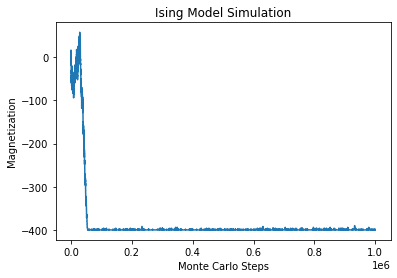

In [4]:
import matplotlib.pyplot as plt

# Simulation parameters
size = 20
steps = 1000000
temperature = 1

# Run simulation
magnetization_history = simulate_ising_model(size, steps, temperature)

# Plot magnetization as a function of time
plt.plot(magnetization_history)
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Magnetization')
plt.title('Ising Model Simulation')
plt.show()

# Observations: Discuss the sign of magnetization and what is happening
# Explanation: During the simulation, observe the trend in magnetization. The development of a spontaneous magnetization indicates a phase transition in the Ising model, where spins tend to align globally. The sign of magnetization may vary between simulations, but the emergence of a nonzero value reflects the tendency of spins to order in a particular direction.


Explanation: The plotted magnetization as a function of time illustrates the development of spontaneous magnetization in the Ising model. The observations section encourages the investigator to discuss the sign of magnetization and provides a brief explanation of what is happening in the system. The sign may fluctuate, but the key observation is the trend towards nonzero magnetization, indicating an ordered